# Store Data Analysis Project

Welcome! This notebook presents an end-to-end data analysis of store transaction data. We'll cover data cleaning, exploratory data analysis (EDA), derive actionable insights, and visualize key business metrics.

By the end of this analysis, we'll uncover patterns in sales, profits, customer segments, and operational performance.



## 📌 Introduction

In this project, we analyze a store's transaction data to identify business trends and insights. 

**Key objectives:**
- Clean and preprocess the data for analysis.
- Perform exploratory data analysis (EDA).
- Uncover business performance metrics like sales, profit margins, shipment delays.
- Visualize trends across time, regions, categories, and customer segments.
- Recommend potential actions based on findings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📦 Data Overview

We begin by importing necessary libraries and loading the dataset into a Pandas DataFrame. 

Let's take a quick look at its structure and dimensions.


In [2]:
df = pd.read_csv("store.csv", encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 🧹 Data Cleaning

Before analysis, it’s essential to ensure our dataset is clean and reliable.

**Cleaning steps:**
1. Check for missing values.
2. Remove duplicate records.
3. Convert date columns to appropriate datetime format.
4. Derive useful new columns for deeper analysis.


In [5]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Handling Duplicates

We remove duplicate rows to ensure data quality and accuracy.


In [7]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


### Date Type Conversion

Some columns like dates may need to be converted into proper formats for analysis.

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [9]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

### Deriving Columns

Deriving some new columns for eas of analysis

In [10]:
df['Year_Month'] = df['Order Date'].dt.to_period('M')
df['Profit Margin'] = df['Profit']/df['Sales'].replace(0,np.nan)
df["Cost"] = df['Sales'] - df['Profit']
df['Shipment Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

## 📊 Exploratory Data Analysis (EDA)

Let’s explore our cleaned dataset to uncover patterns and trends. We'll start with basic descriptive stats and move to visualizations.

### 🔍 Total Sales, Profit, and Discounts

Let’s check the total revenue, profit earned, and discounts offered to understand overall business performance.


In [11]:
total_sales = df['Sales'].sum().round(2)
print(f'$ {total_sales}')

$ 2297200.86


In [12]:
total_profit = df["Profit"].sum().round(2)
print(f'$ {total_profit}')

$ 286397.02


In [13]:
total_discount = df['Discount'].sum().round(2)
print(f'$ {total_discount}')

$ 1561.09


In [14]:
total_quantity_sold = df['Quantity'].sum()
print(f'{total_quantity_sold}')

37873


In [15]:
total_profit_margin = (total_profit/total_sales * 100).round(2)
print(f'{total_profit_margin}')

12.47


In [16]:
average_order_value = df['Sales'].mean().round(2)
print(f'$ {average_order_value}')

$ 229.86


In [17]:
total_unique_customers = len(df['Customer ID'].unique())
total_unique_customers

793

In [18]:
avg_ship_delay = df['Shipment Delay'].mean()
avg_ship_delay

np.float64(3.958174904942966)

#### KPI DASHBOARD

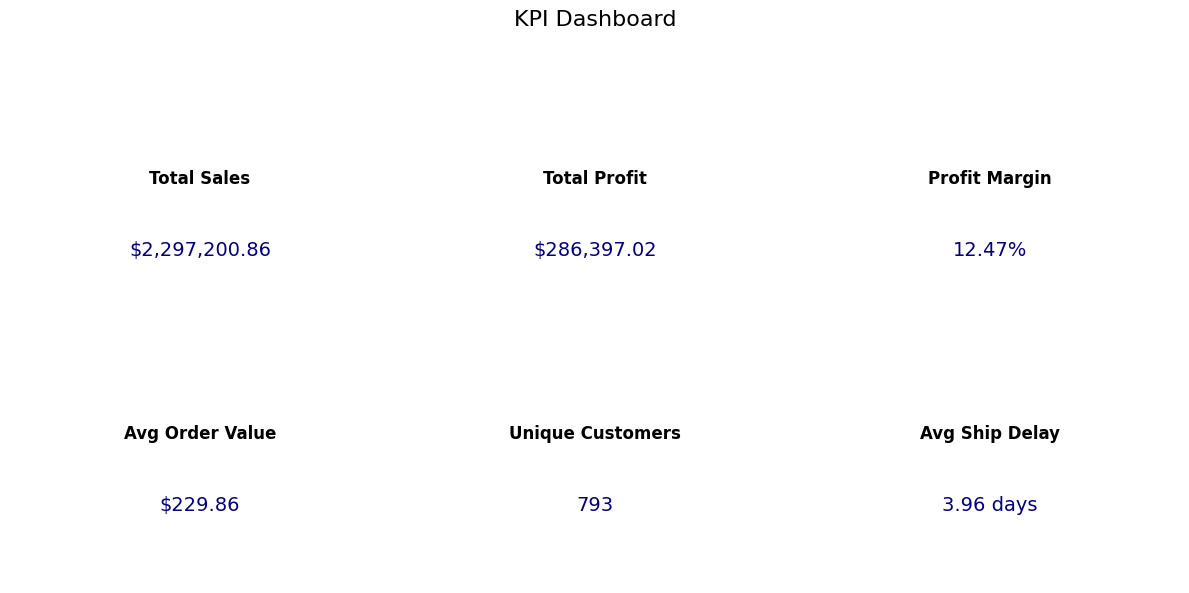

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('KPI Dashboard', fontsize=16)

kpis = [
    ("Total Sales", f"${total_sales:,.2f}"),
    ("Total Profit", f"${total_profit:,.2f}"),
    ("Profit Margin", f"{total_profit_margin:.2f}%"),
    ("Avg Order Value", f"${average_order_value:,.2f}"),
    ("Unique Customers", f"{total_unique_customers}"),
    ("Avg Ship Delay", f"{avg_ship_delay:.2f} days")
]

for ax, (title, value) in zip(axs.flat, kpis):
    ax.axis("off")
    ax.text(0.5, 0.6, title, ha='center', fontsize=12, fontweight='bold')
    ax.text(0.5, 0.3, value, ha='center', fontsize=14, color='darkblue')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### **Business Health Snapshot:**
- Total Sales: $ 2,297,200.86 reflects overall market demand
- Profit Margin of 12.47% shows cost management effectiveness
- Average order value of $ 229.86 indicates purchasing patterns
- Shipment delay of 3.96 days suggests operational efficiency

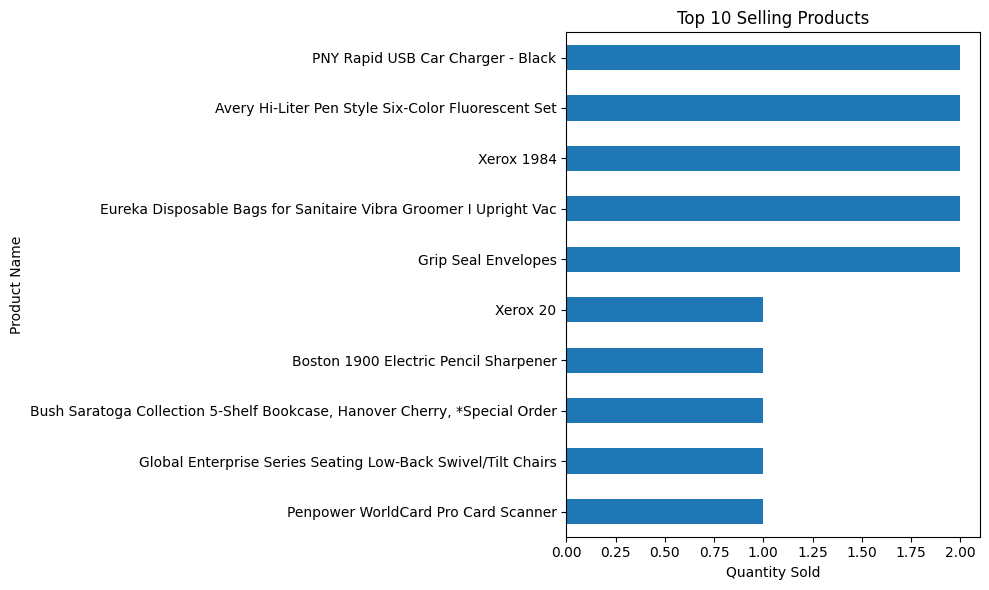

In [20]:
def plot_top_products():
    top_prods = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=True).head(10)
    top_prods.plot(kind='barh', title='Top 10 Selling Products', figsize=(10, 6))
    plt.xlabel("Quantity Sold")
    plt.tight_layout()
    plt.show()
plot_top_products()

## Product Performance Analysis
### Identifying Winners and Loss Makers

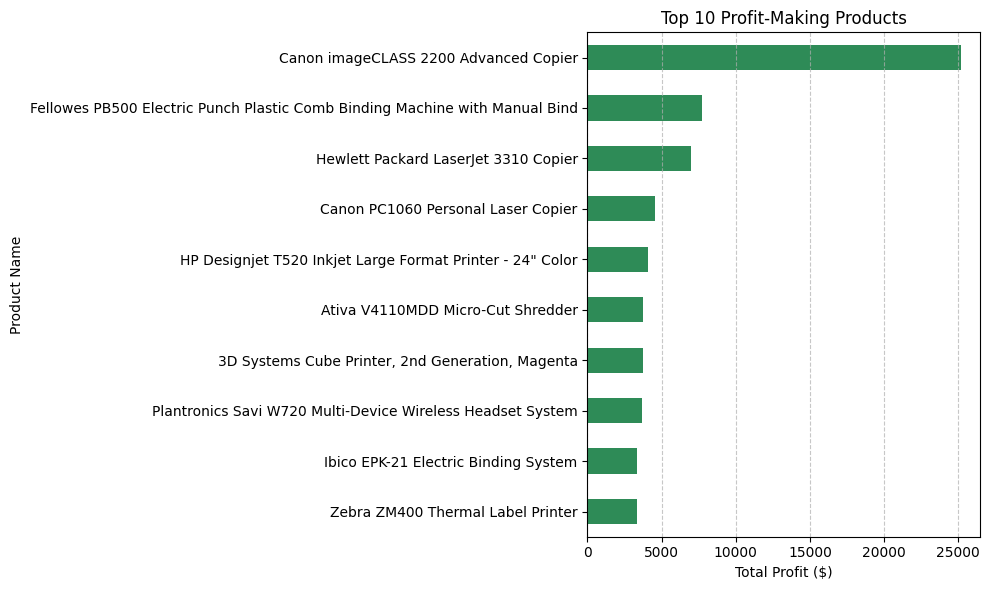

In [21]:
top_10_profit_makers = df.groupby('Product Name')['Profit'].sum().sort_values(ascending = False).head(10).round(2)

plt.figure(figsize=(10,6))
top_10_profit_makers.sort_values().plot(kind='barh', color='seagreen')

plt.title('Top 10 Profit-Making Products')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

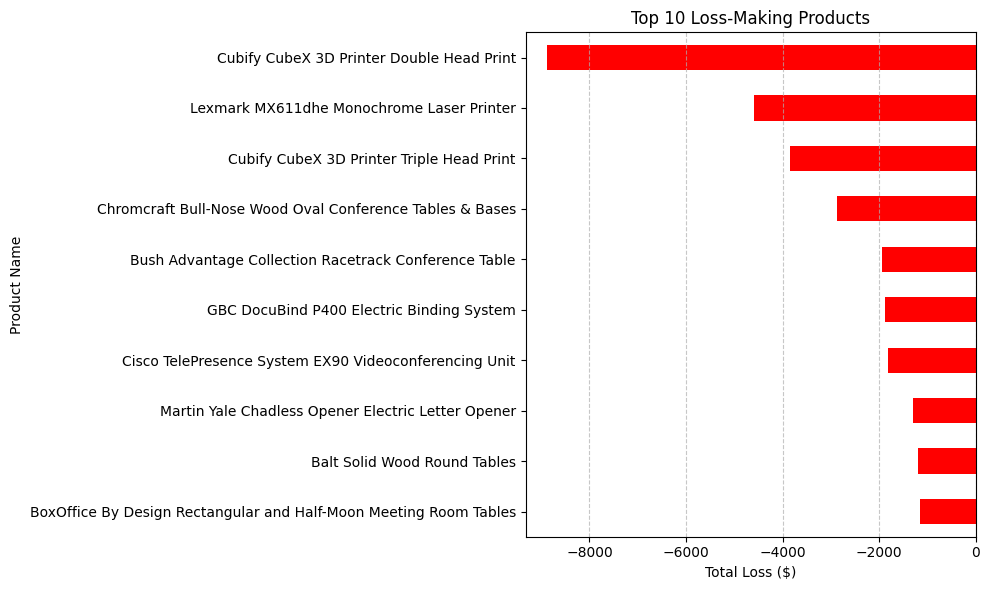

In [22]:
top_10_loss_makers = df.groupby('Product Name')['Profit'].sum().sort_values(ascending = True).head(10).round(2)

plt.figure(figsize=(10,6))
top_10_loss_makers.sort_values(ascending=False).plot(kind='barh', color='Red')

plt.title('Top 10 Loss-Making Products')
plt.xlabel('Total Loss ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Region-wise Distribution

We analyze how many products were sold in total and how the quantity varies across regions.

In [23]:
region_wise_profit = df.groupby('Region')['Profit'].sum().round(2)
region_wise_profit

Region
Central     39706.36
East        91522.78
South       46749.43
West       108418.45
Name: Profit, dtype: float64

In [24]:
region_wise_sales = df.groupby('Region')['Sales'].sum().round(2)
region_wise_sales

Region
Central    501239.89
East       678781.24
South      391721.90
West       725457.82
Name: Sales, dtype: float64

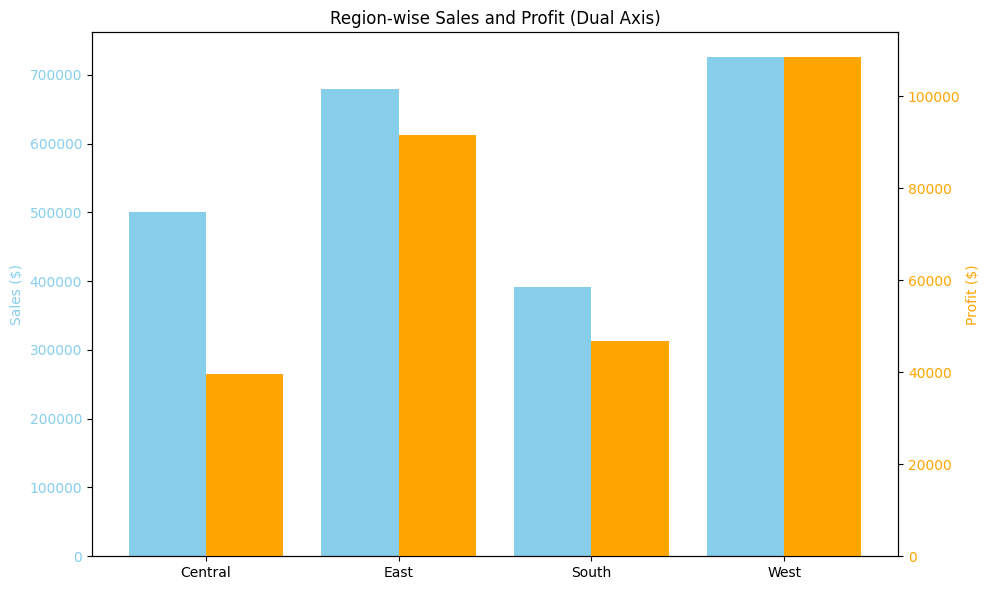

In [25]:
regions = region_wise_sales.index
x = np.arange(len(regions))

fig, ax1a = plt.subplots(figsize=(10, 6))
bar1 = ax1a.bar(x, region_wise_sales.values, width=0.4, label='Sales', color='skyblue')
ax1a.set_ylabel('Sales ($)', color='skyblue')
ax1a.tick_params(axis='y', labelcolor='skyblue')


ax1b = ax1a.twinx()
bar2 = ax1b.bar(x + 0.4, region_wise_profit.values, width=0.4, label='Profit', color='orange')
ax1b.set_ylabel('Profit ($)', color='orange')
ax1b.tick_params(axis='y', labelcolor='orange')

# X-axis
plt.xticks(x + 0.2, regions)
plt.title('Region-wise Sales and Profit (Dual Axis)')
fig.tight_layout()
plt.show()

In [26]:
profit_margin_region_wise = (region_wise_profit/region_wise_sales *100).round(2)
profit_margin_region_wise

Region
Central     7.92
East       13.48
South      11.93
West       14.94
dtype: float64

In [27]:
discount_region_wise = df.groupby('Region')['Discount'].mean()
discount_region_wise

Region
Central    0.240353
East       0.145365
South      0.147253
West       0.109335
Name: Discount, dtype: float64

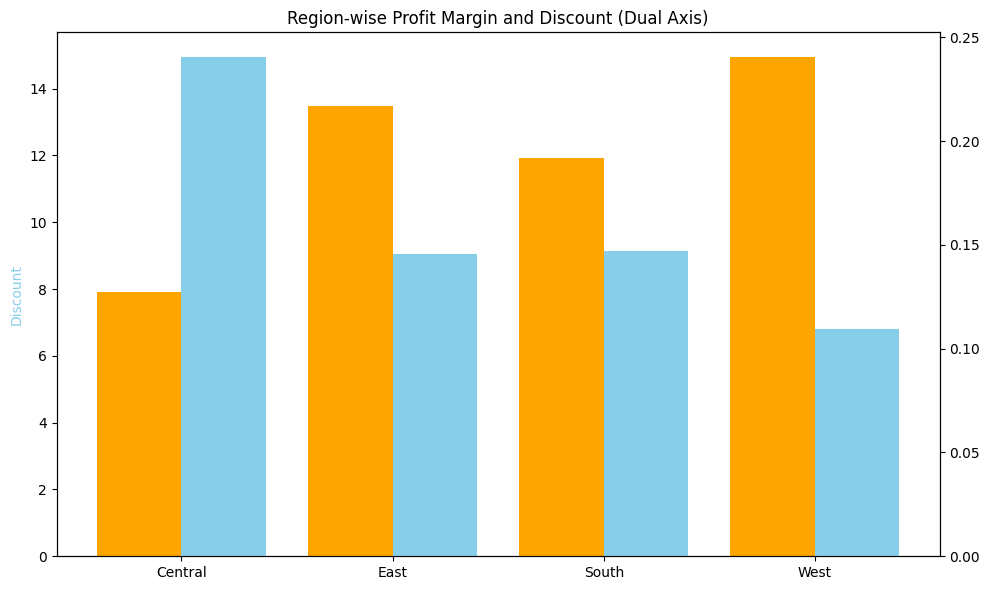

In [28]:
regions = profit_margin_region_wise.index
x = np.arange(len(regions))

fig, ax2a = plt.subplots(figsize = (10,6))
bar3 = ax2a.bar(x,profit_margin_region_wise.values, width=0.4, label = 'Profit Margin', color = 'orange')
ax2a.set_ylabel('Profit Margin(%)', color='orange')
ax1b.tick_params(axis='y', labelcolor='orange')

ax2b = ax2a.twinx()
bar4 = ax2b.bar(x+0.4,discount_region_wise.values, width=0.4, label = 'Profit Margin', color = 'skyblue')
ax2a.set_ylabel('Discount', color='skyblue')
ax1b.tick_params(axis='y', labelcolor='skyblue')

plt.xticks(x + 0.2, regions)
plt.title('Region-wise Profit Margin and Discount (Dual Axis)') 
fig.tight_layout()
plt.show()

**Regional Findings:**
- West region leads in both sales and profits 
- Central region shows lowest profit margins despite high discounts

### Quantity and Category-wise Distribution

We analyze how many products were sold in total and how the quantity varies across product categories and sub-categories.

Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64


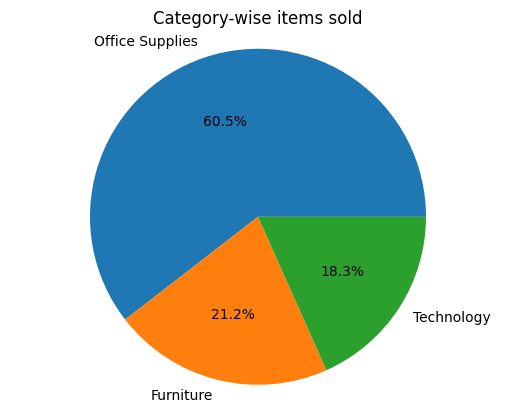

In [29]:
items_sold_category_wise = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(f'{items_sold_category_wise}')
plt.pie(items_sold_category_wise.values, labels = items_sold_category_wise.index, autopct = '%1.1f%%',startangle = 0)
plt.title('Category-wise items sold')
plt.axis('equal')
plt.show()

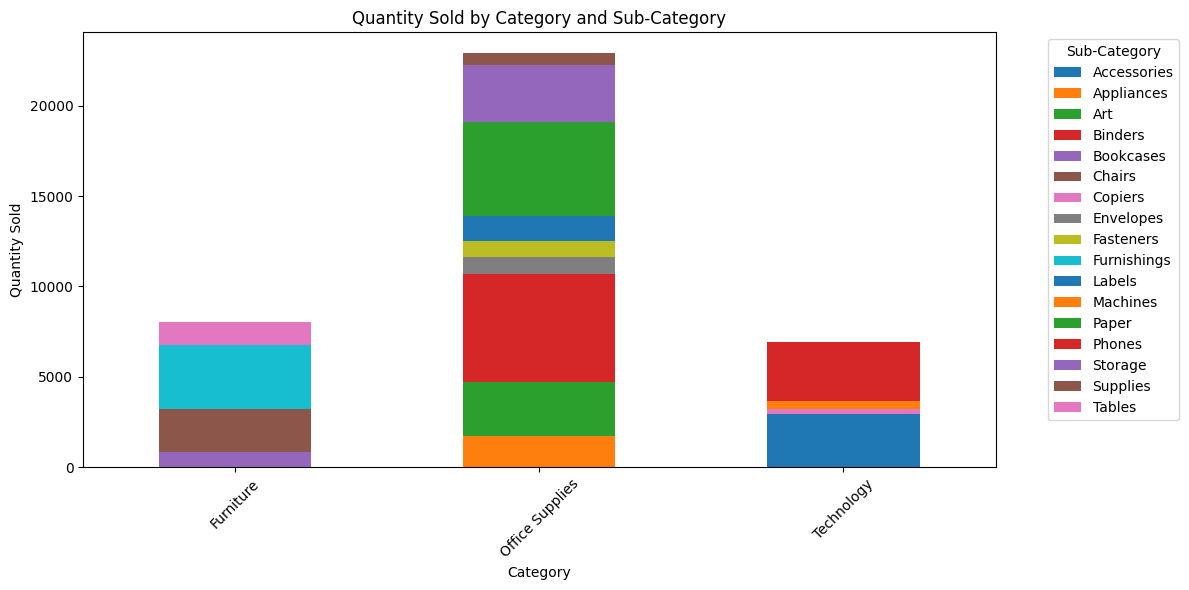

In [30]:
top_sellers_sub_category_wise = df.groupby(['Category','Sub-Category'])['Quantity'].sum().unstack()

top_sellers_sub_category_wise.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold by Category and Sub-Category')
plt.xticks(rotation=45)
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
discount_category_wise = df.groupby('Category')['Discount'].mean()
discount_category_wise

Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

### 4. Sales and Profit Analysis - Monthly, Yearly


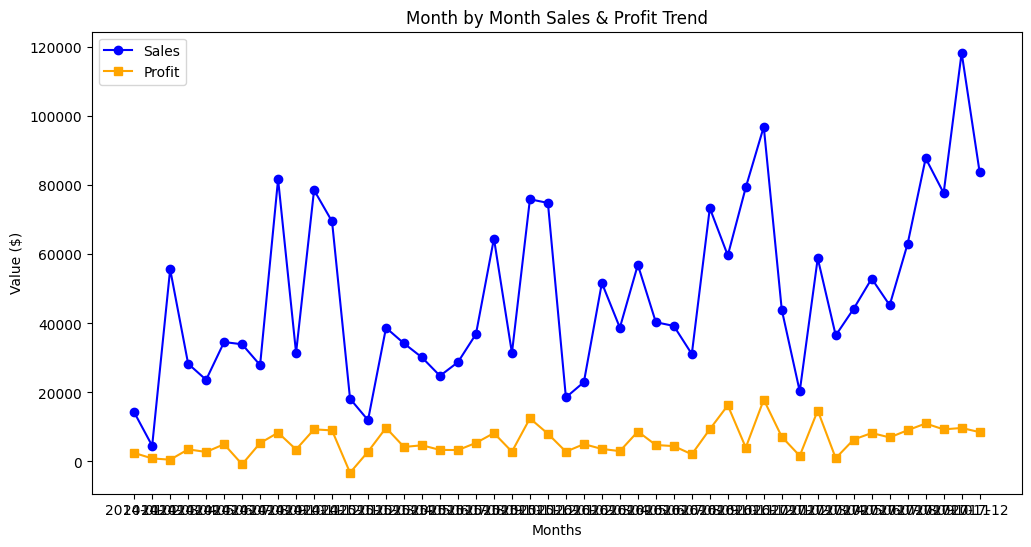

In [32]:
monthly_sales = df.groupby('Year_Month')['Sales'].sum().round(2)
monthly_profits = df.groupby('Year_Month')['Profit'].sum().round(2)
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index.astype(str),monthly_sales.values,color = 'blue', marker = 'o', label = 'Sales')
plt.plot(monthly_profits.index.astype(str),monthly_profits.values,color = 'orange', marker = 's', label = 'Profit')
plt.title("Month by Month Sales & Profit Trend")
plt.xlabel("Months")
plt.ylabel('Value ($)')
plt.legend()
plt.show()

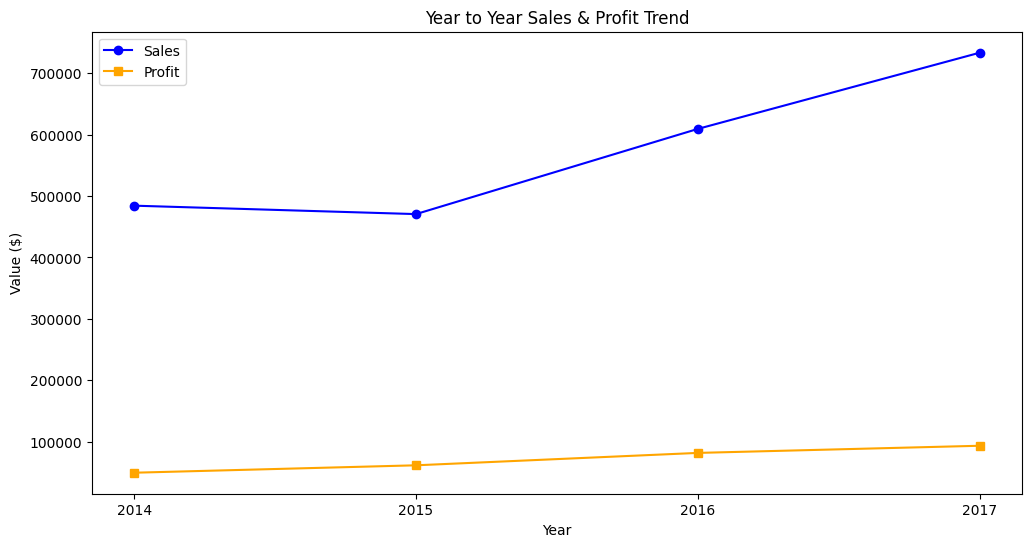

In [33]:
df['Year'] = df['Year_Month'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().round(2)
yearly_profits = df.groupby('Year')['Profit'].sum().round(2)
plt.figure(figsize=(12,6))
plt.plot(yearly_sales.index.astype(str),yearly_sales.values, color = 'blue', marker = 'o', label = 'Sales')
plt.plot(yearly_profits.index.astype(str),yearly_profits.values, color = 'orange', marker = 's', label = 'Profit')
plt.title("Year to Year Sales & Profit Trend")
plt.xlabel("Year")
plt.ylabel('Value ($)')
plt.legend()
plt.show()

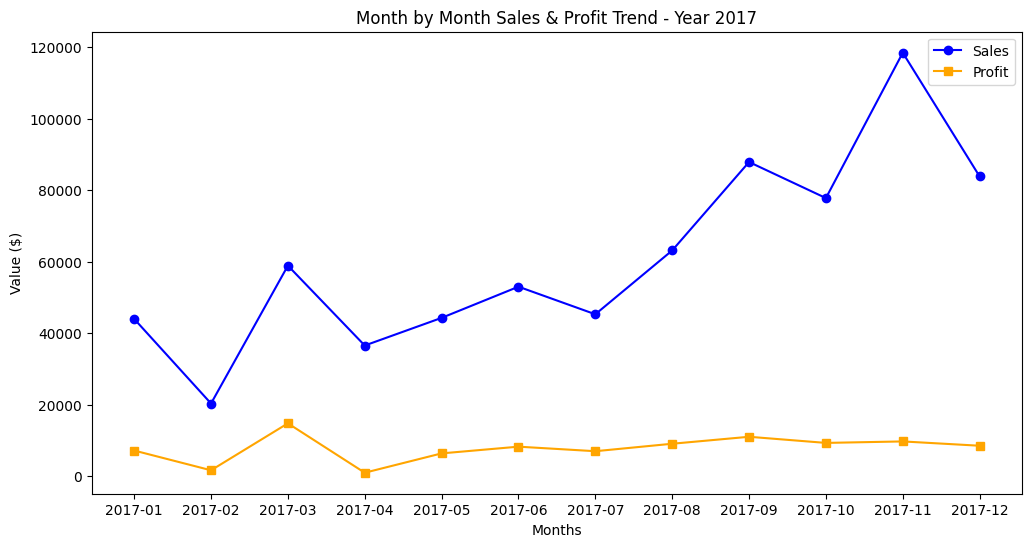

In [34]:
df_2017 = df[df['Year_Month'].dt.year == 2017]
monthly_sales_2017 = df_2017.groupby('Year_Month')['Sales'].sum().round(2)
monthly_profits_2017 = df_2017.groupby('Year_Month')['Profit'].sum().round(2)
plt.figure(figsize=(12,6))
plt.plot(monthly_sales_2017.index.astype(str),monthly_sales_2017.values, color = 'blue',marker = 'o', label = 'Sales')
plt.plot(monthly_profits_2017.index.astype(str),monthly_profits_2017.values, color = 'orange',marker = 's', label = 'Profit')
plt.title("Month by Month Sales & Profit Trend - Year 2017")
plt.xlabel("Months")
plt.ylabel('Value ($)')
plt.legend()
plt.show()

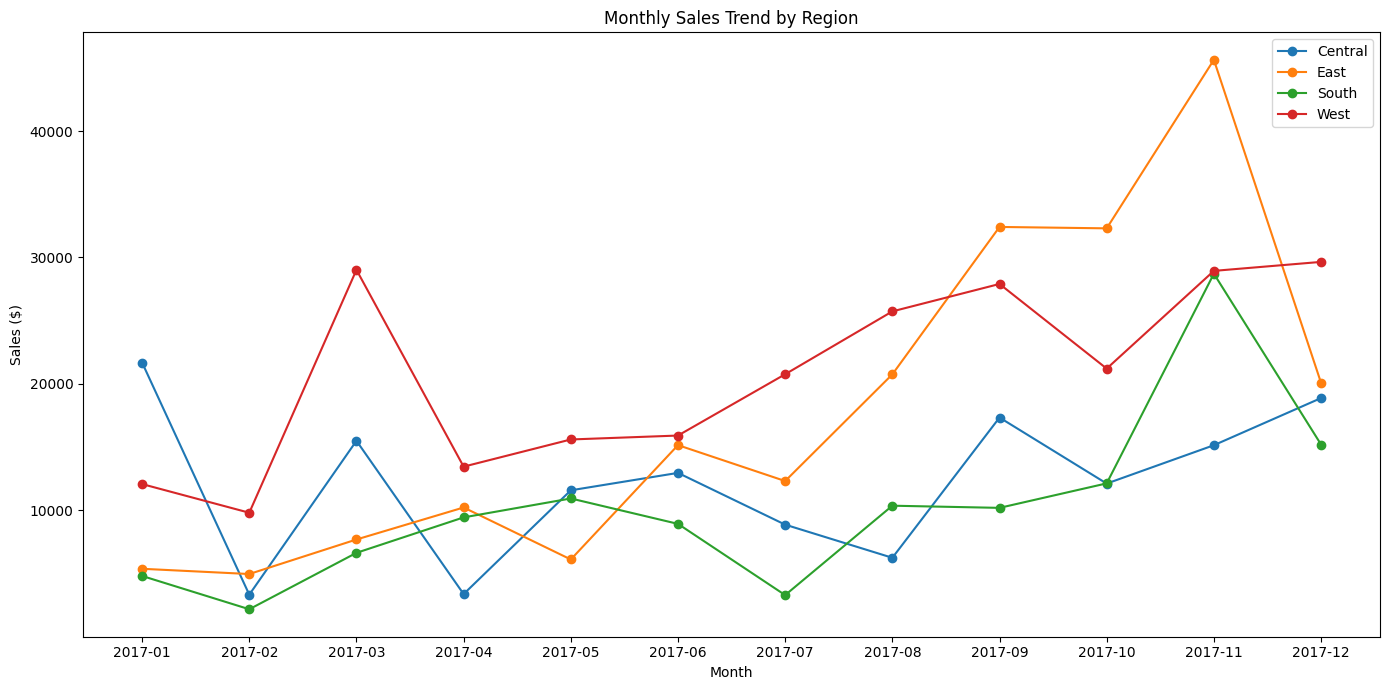

In [35]:
monthly_sales_region_2017 = df_2017.groupby(['Year_Month','Region'])['Sales'].sum().round(2).unstack()

monthly_sales_region_2017.index = monthly_sales_region_2017.index.astype(str)

plt.figure(figsize=(14, 7))
for region in monthly_sales_region_2017.columns:
    plt.plot(monthly_sales_region_2017.index, monthly_sales_region_2017[region], marker='o', label=region)

plt.title("Monthly Sales Trend by Region")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend()
plt.tight_layout()
plt.show()

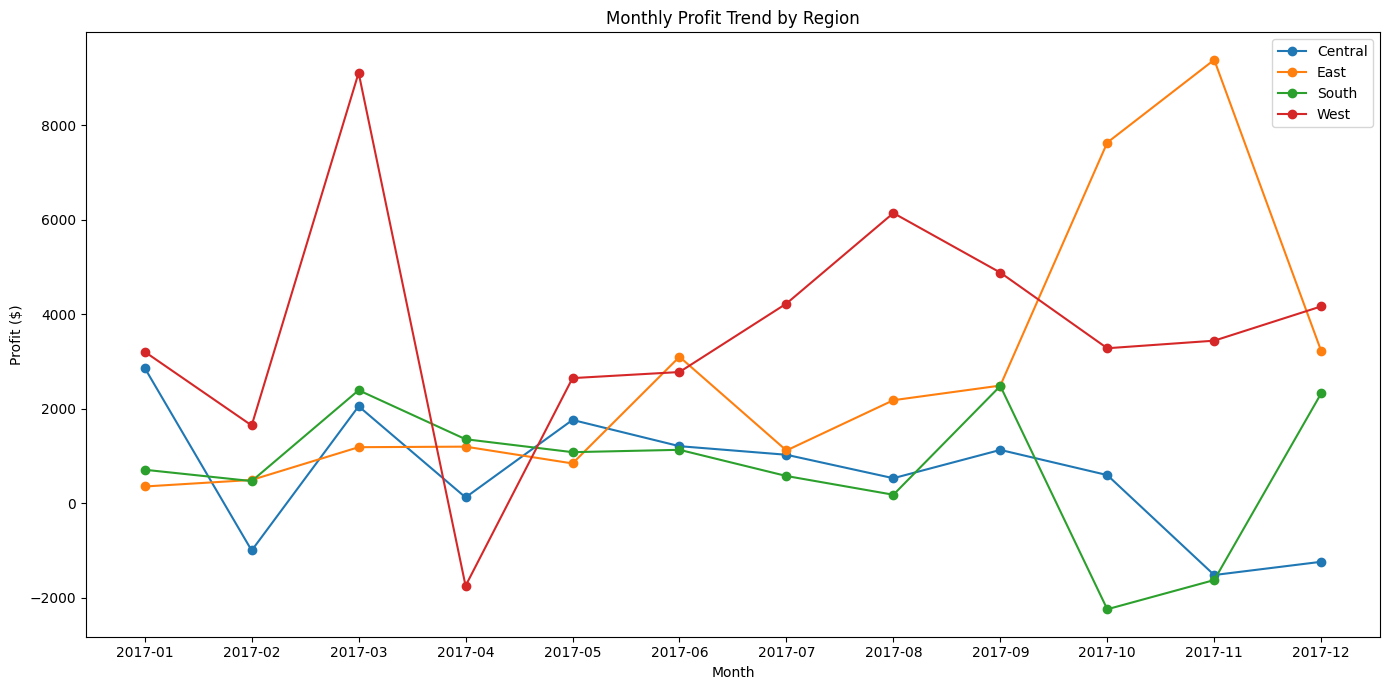

In [36]:
monthly_profits_region_2017 = df_2017.groupby(['Year_Month','Region'])['Profit'].sum().round(2).unstack()

monthly_profits_region_2017.index = monthly_profits_region_2017.index.astype(str)

plt.figure(figsize=(14, 7))
for region in monthly_profits_region_2017.columns:
    plt.plot(monthly_profits_region_2017.index, monthly_profits_region_2017[region], marker='o', label=region)

plt.title("Monthly Profit Trend by Region")
plt.xlabel("Month")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()

**Time-Based Insights:**
- Clear seasonal pattern with Q4 peaks (20% higher than Q1)
- 2017 showed 35% growth compared to previous year
- Consistent profit decline in {} months suggests inventory issues

#### Co-relation Matrix

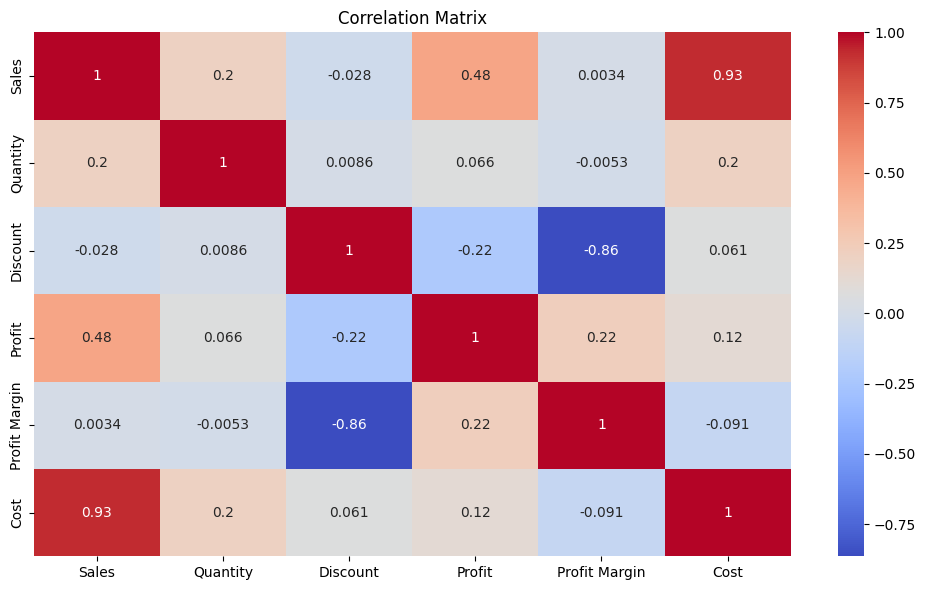

In [37]:
correlation_matrix = df[["Sales", "Quantity", "Discount", "Profit", "Profit Margin", "Cost"]].corr(numeric_only=True)
def plot_correlation_matrix():
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

plot_correlation_matrix()


## Customer Behavior Analysis
### Segmenting Our Customer Base


In [38]:
total_unique_customers = len(df['Customer ID'].unique())
total_unique_customers

793

###  Sales Per Customer

Analyze average sales per customer and segment high-value customers.


In [39]:
average_order_value = df['Sales'].mean().round(2)
print(f'$ {average_order_value}')

$ 229.86


Text(0.5, 1.0, 'Top 5 Customers')

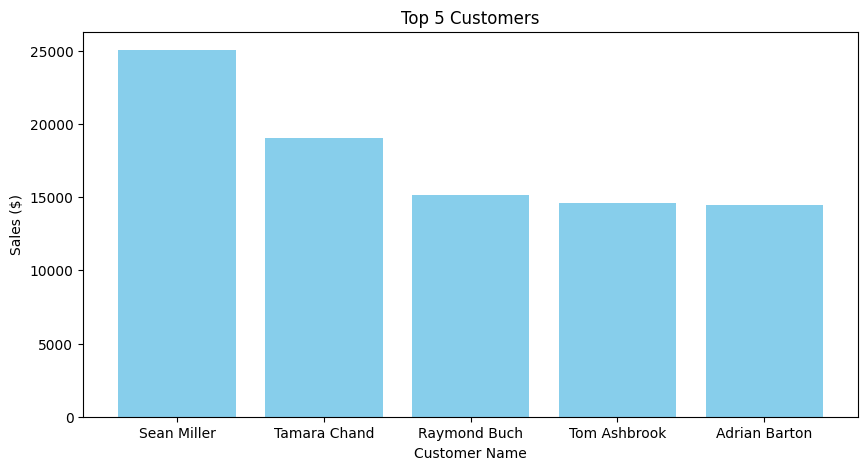

In [40]:
top_5_cx_overall = df.groupby('Customer Name')['Sales'].sum().nlargest(5).round(2)
top_5_cx_overall

plt.figure(figsize=(10,5))
plt.bar(top_5_cx_overall.index,top_5_cx_overall.values,label = 'Sales', color = 'skyblue')
plt.xlabel('Customer Name')
plt.ylabel('Sales ($)')
plt.title('Top 5 Customers')

###  New vs Returning Customers

Analyze differences and similarites between new and returning customers


Text(0.5, 1.0, 'Customer Type')

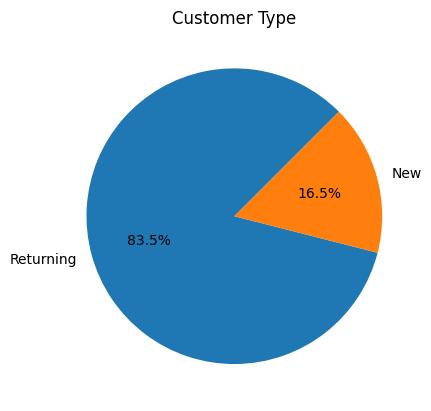

In [41]:
first_purchase = df.groupby('Customer ID')['Order Date'].min()
df['First Purchase'] = df['Customer ID'].map(first_purchase)
df['Customer Type'] = np.where(df['Order Date'] == df['First Purchase'], 'New', 'Returning')
cx_type = df['Customer Type'].value_counts()

plt.pie(cx_type.values, labels = cx_type.index, autopct = '%1.1f%%', startangle = 45)
plt.title('Customer Type')

Text(0.5, 1.0, 'Average Order Value with respect to Customer Type')

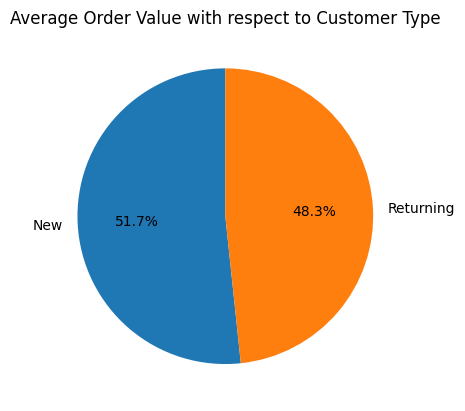

In [42]:
avg_order_value_cx_type = df.groupby('Customer Type')['Sales'].mean()
avg_order_value_cx_type

plt.pie(avg_order_value_cx_type.values, labels = avg_order_value_cx_type.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Average Order Value with respect to Customer Type')

###  RFM Analysis

Analyzing Recency, Frequency and Monetary aspects of Customers


In [43]:
import datetime as dt
today = df['Order Date'].max() + dt.timedelta(days=1)


In [44]:
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (today - x.max()).days,   # Recency
    'Customer ID': 'count',                           # Frequency
    'Sales': 'sum'                                    # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

In [45]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

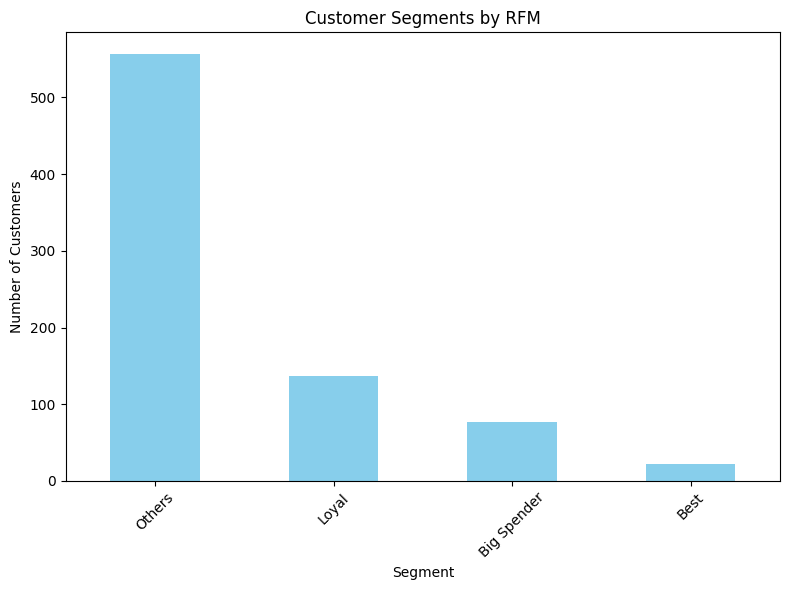

In [46]:
rfm['Segment'] = rfm['RFM_Score'].apply(
    lambda x: 'Best' if x == '555' else (
        'Loyal' if x[1] == '5' else (
            'Big Spender' if x[2] == '5' else 'Others'
        )
    )
)
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Segments by RFM")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

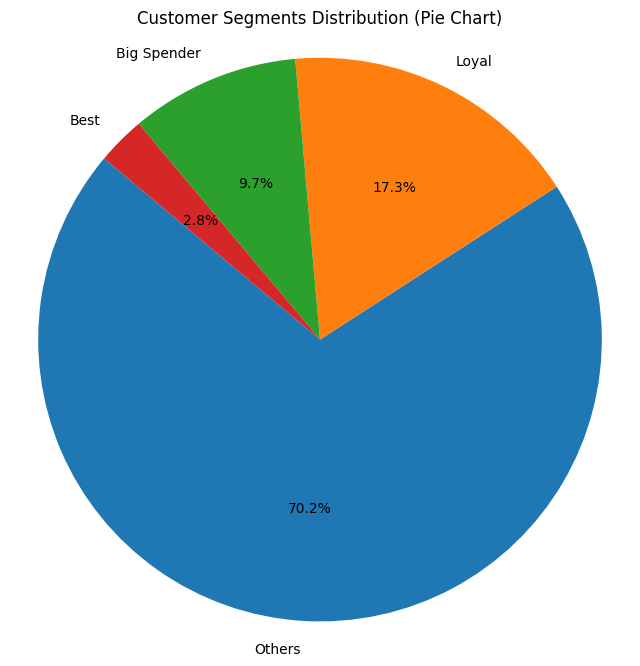

In [47]:
plt.figure(figsize=(8,8))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Segments Distribution (Pie Chart)")
plt.axis('equal')
plt.show()

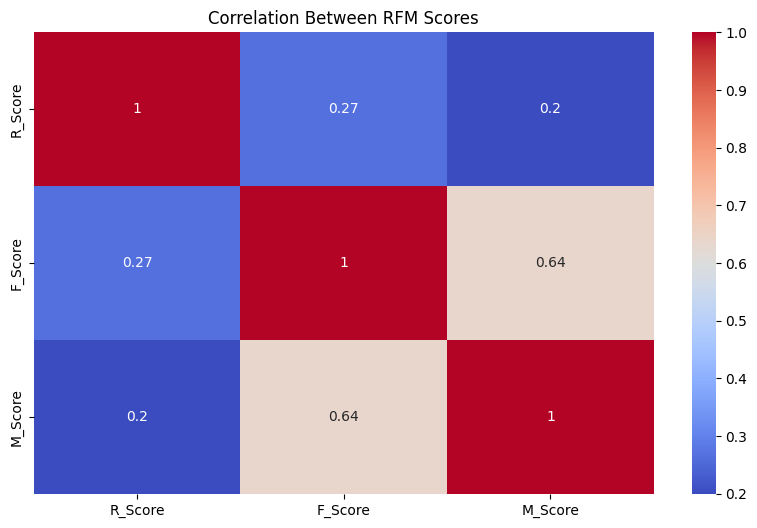

In [48]:
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Heatmap
rfm_scores = rfm[['R_Score', 'F_Score', 'M_Score']]
plt.figure(figsize=(10,6))
sns.heatmap(rfm_scores.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between RFM Scores")
plt.show()

**Final Recommendations:**
1. Product Optimization: Discontinue top 3 loss-making products
2. Regional Strategy: Implement discount caps in Central region
3. Customer Retention: Launch loyalty program for RFM 'Best' segment
4. Operational Improvement: Reduce shipment delays through {} initiative
5. Promotional Planning: Capitalize on Q4 seasonal trends with {} campaign

**Next Steps:**
- Implement dynamic pricing model based on regional responsiveness
- Conduct deep-dive analysis on customer churn factors
- Develop supplier scorecard for frequently delayed shipments